<a href="https://colab.research.google.com/github/jagvgithub/Algortimos_optimizacion_VIU/blob/main/Algoritmos_R2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmos de optimización - Reto 2

Nombre: Jose Antonio Gómez Vargas

Github: [Enlace directo a Github](https://github.com/jagvgithub/Algortimos_optimizacion_VIU/blob/main/Algoritmos_R1.ipynb)

- https://colab.research.google.com/github/jagvgithub/Algortimos_optimizacion_VIU/blob/main/Algoritmos_R2.ipynb

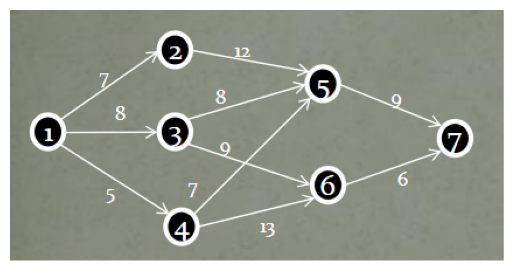

In [17]:
import requests  # Para hacer solicitudes HTTP y descargar contenido de la web
from PIL import Image  # Para abrir, manipular y guardar diferentes formatos de imágenes
from io import BytesIO  # Para manipular flujos de datos en memoria como si fueran archivos
import matplotlib.pyplot as plt  # Para crear visualizaciones y gráficos en Python
import networkx as nx  # Para crear, manipular y estudiar la estructura de grafos y redes complejas
import numpy as np  # Para trabajar con arreglos y matrices multidimensionales y realizar operaciones matemáticas de alto nivel
from mpl_toolkits.mplot3d import Axes3D # grafico de funciones en 3d


# URL de la imagen en GitHub
url = "https://raw.githubusercontent.com/jagvgithub/Algortimos_optimizacion_VIU/main/dinamica.png"

# Solicitar la imagen
response = requests.get(url)
img = Image.open(BytesIO(response.content))

# Mostrar la imagen
plt.imshow(img)
plt.axis('off') # Ocultar los ejes
plt.show()


## Programación Dinámica. Viaje por el rio
* **Definición**: Es posible dividir el problema en subproblemas más pequeños, guardando las soluciones para ser utilizadas más adelante.
* **Características** que permiten identificar problemas aplicables:<br>
  -Es posible almacenar soluciones de los subproblemas para ser utilizados más adelante<br>
  -Debe verificar el principio de optimalidad de Bellman: “en una secuencia optima de decisiones, toda sub-secuencia también es óptima” (*)<br>
  -La necesidad de guardar la información acerca de las soluciones parciales unido a la recursividad provoca la necesidad de preocuparnos por la complejidad espacial (cuantos recursos de espacio usaremos)<br>

### Problema<br>
En un río hay **n** embarcaderos y debemos desplazarnos río abajo desde un embarcadero a otro. Cada embarcadero tiene precios diferentes para ir de un embarcadero a otro situado más abajo. Para ir del embarcadero i al j, puede ocurrir que sea más barato hacer un trasbordo por un embarcadero intermedio k. El problema consiste en determinar la combinación más barata.



* Resuelve el problema del descenso por el rio utilizando la técnica de optimización que consideres más adecuada.

---
# Viaje por el rio - Programación dinámica

---

Donde,


- $n$ es el número de embarcaderos.

- $minCost$ es un arreglo que almacenará el costo mínimo de llegar a cada embarcadero desde el embarcadero 0. Se inicializa con float(∞) para representar que inicialmente todos los costos son desconocidos, excepto el costo de llegar al primer embarcadero, que es 0 $(minCost[0] = 0)$.


---
Algoritmo de Programación Dinámica:

* Utilizamos dos bucles anidados para recorrer todos los pares de embarcaderos (i, j) donde $j$ $>$ $i$.
Actualizamos $minCost[j]$ si encontramos una ruta más barata para llegar al embarcadero $j$ a través del embarcadero $i$.
Resultado:

Después de ejecutar los bucles, $minCost[n-1]$ contendrá el costo mínimo para llegar desde el embarcadero 0 al embarcadero $n-1$.

In [18]:
#Viaje por el rio - Programación dinámica

''' funciones necesarias '''

''' Programación dinámica del problema '''

def min_cost_descent_with_path(cost):
    n = len(cost)
    # Inicializamos el arreglo de costos mínimos con infinito
    minCost = [float('inf')] * n
    # Inicializamos el arreglo de rutas
    path = [-1] * n
    # El costo de llegar al embarcadero 0 desde el embarcadero 0 es 0
    minCost[0] = 0

    # Calculamos el costo mínimo para cada embarcadero
    for i in range(n):
        for j in range(i + 1, n):
            if minCost[j] > minCost[i] + cost[i][j]:
                minCost[j] = minCost[i] + cost[i][j]
                path[j] = i

    # Reconstruir la ruta óptima
    optimal_path = []
    current = n - 1
    while current != -1:
        optimal_path.append(current)
        current = path[current]
    optimal_path.reverse()

    return minCost[n-1], optimal_path


''' Visualización en grafos del problema '''

def draw_graph(cost):
    G = nx.DiGraph()
    n = len(cost)

    # Agregar nodos
    for i in range(n):
        G.add_node(i)

    # Agregar aristas con costos
    for i in range(n):
        for j in range(i + 1, n):
            if cost[i][j] != float('inf'):
                G.add_edge(i, j, weight=cost[i][j])

    pos = nx.spring_layout(G)  # Layout para la posición de los nodos
    edge_labels = nx.get_edge_attributes(G, 'weight')

    # Dibujar nodos y etiquetas de nodos
    nx.draw_networkx_nodes(G, pos)
    nx.draw_networkx_labels(G, pos)

    # Dibujar aristas
    nx.draw_networkx_edges(G, pos, arrowstyle='-|>', arrowsize=20)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    plt.title("Grafo del Problema del Descenso por el Río")
    plt.show()

---
Ejercicio 1

---

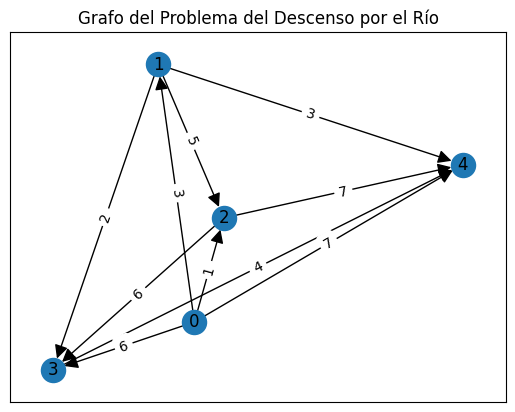


 El costo mínimo para descender por el río es: 6

 La ruta óptima es: [0, 1, 4]


In [22]:
# Ejemplo de uso
cost = [
    [0, 3, 1, 6, 7],
    [float('inf'), 0, 5, 2, 3],
    [float('inf'), float('inf'), 0, 6, 7],
    [float('inf'), float('inf'), float('inf'), 0, 4],
    [float('inf'), float('inf'), float('inf'), float('inf'), 0]
]

cost_min, ruta_optima = min_cost_descent_with_path(cost)
draw_graph(cost)

print("\n El costo mínimo para descender por el río es:", cost_min)
print("\n La ruta óptima es:", ruta_optima)

---
Ejercicio 2

---

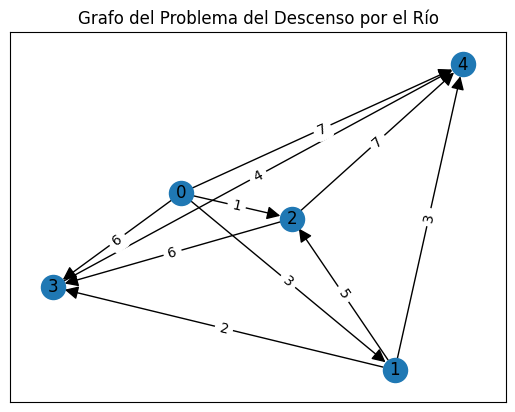


 El costo mínimo para descender por el río es: 17

 La ruta óptima es: [0, 1, 2, 4, 5, 6, 7, 9]


In [24]:
cost1 = [
    [0, 2, 4, float('inf'), float('inf'), float('inf'), float('inf'), float('inf'), float('inf'), float('inf')],
    [float('inf'), 0, 1, 7, float('inf'), float('inf'), float('inf'), float('inf'), float('inf'), float('inf')],
    [float('inf'), float('inf'), 0, float('inf'), 3, float('inf'), float('inf'), float('inf'), float('inf'), float('inf')],
    [float('inf'), float('inf'), float('inf'), 0, 2, 6, float('inf'), float('inf'), float('inf'), float('inf')],
    [float('inf'), float('inf'), float('inf'), float('inf'), 0, 5, float('inf'), float('inf'), float('inf'), float('inf')],
    [float('inf'), float('inf'), float('inf'), float('inf'), float('inf'), 0, 1, float('inf'), float('inf'), float('inf')],
    [float('inf'), float('inf'), float('inf'), float('inf'), float('inf'), float('inf'), 0, 3, 4, float('inf')],
    [float('inf'), float('inf'), float('inf'), float('inf'), float('inf'), float('inf'), float('inf'), 0, float('inf'), 2],
    [float('inf'), float('inf'), float('inf'), float('inf'), float('inf'), float('inf'), float('inf'), float('inf'), 0, 1],
    [float('inf'), float('inf'), float('inf'), float('inf'), float('inf'), float('inf'), float('inf'), float('inf'), float('inf'), 0]
]

cost_min, ruta_optima = min_cost_descent_with_path(cost1)
draw_graph(cost)

print("\n El costo mínimo para descender por el río es:", cost_min)
print("\n La ruta óptima es:", ruta_optima)

---
# Descenso del gradiente

---

In [ ]:
import math                      #Funciones matematicas
import matplotlib.pyplot as plt  #Generacion de gráficos (otra opcion seaborn)
import numpy as np               #Tratamiento matriz N-dimensionales y otras (fundamental!)
#import scipy as sc
import random

Vamos a buscar el minimo de la funcion paraboloide : $$f(x) =  x² + y²$$

Obviamente se encuentra en (x,y)=(0,0) pero probaremos como llegamos a él a través del descenso del gradiante.

In [25]:
#Definimos la funcion
#Paraboloide
f  = lambda X:      X[0]**2 + X[1]**2    #Funcion
df = lambda X: [2*X[0] , 2*X[1]]         #Gradiente

df([1,2])

[2, 4]

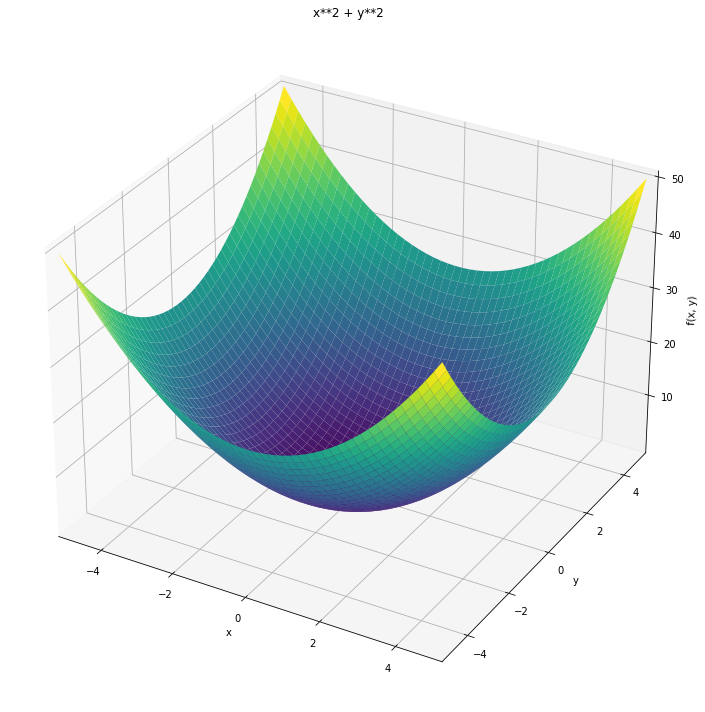

In [ ]:
from sympy import symbols
from sympy.plotting import plot
from sympy.plotting import plot3d
x,y = symbols('x y')
plot3d(x**2 + y**2,
       (x,-5,5),(y,-5,5),
       title='x**2 + y**2',
       size=(10,10))

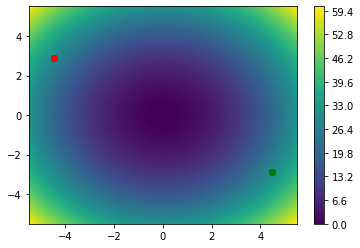

Solucion: [4.472126877392311, -2.888208824237993] 28.341669019900912


In [ ]:
#Prepara los datos para dibujar mapa de niveles de Z
resolucion = 100
rango=5.5

X=np.linspace(-rango,rango,resolucion)
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f([x,y])

#Pinta el mapa de niveles de Z
plt.contourf(X,Y,Z,resolucion)
plt.colorbar()

#Generamos un punto aleatorio inicial y pintamos de blanco
P=[random.uniform(-5,5  ),random.uniform(-5,5 ) ]
plt.plot(P[0],P[1],"o",c="white")

#Tasa de aprendizaje. Fija. Sería más efectivo reducirlo a medida que nos acercamos.
TA=1

#Iteraciones:50
for _ in range(1000):
  grad = df(P)
  #print(P,grad)
  P[0],P[1] = P[0] - TA*grad[0] , P[1] - TA*grad[1]
  plt.plot(P[0],P[1],"o",c="red")

#Dibujamos el punto final y pintamos de verde
plt.plot(P[0],P[1],"o",c="green")
plt.show()
print("Solucion:" , P , f(P))


## Reto

Optimizar la función siguiente mediante el algoritmo por descenso del gradiente.

$f(x) = \sin\left(\frac{1}{2} x^2 - \frac{1}{4} y^2 + 3\right) \cdot \cos(2x + 1 - e^y)$





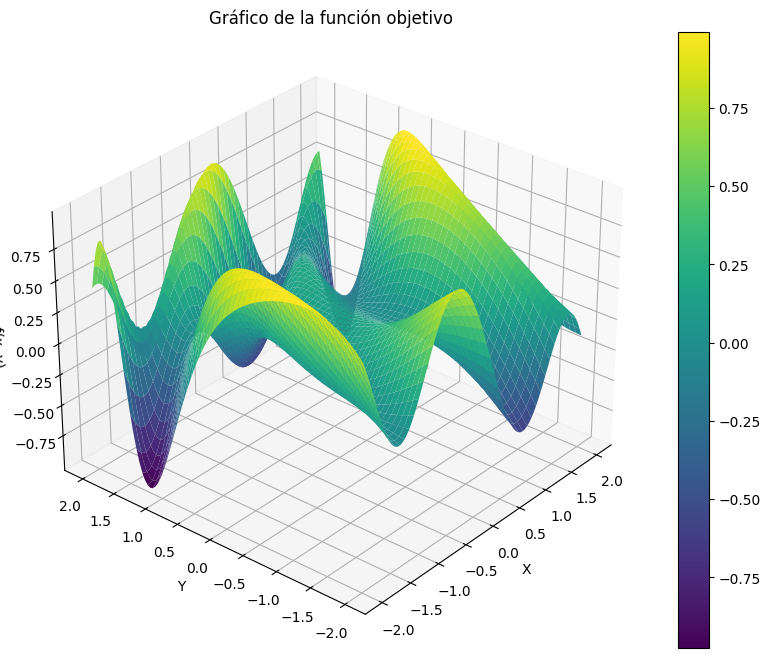

In [31]:
# Definir el rango de valores para x y y
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)

# Crear una malla de valores de x e y
X, Y = np.meshgrid(x, y)

# Calcular los valores de la función f(x, y) para cada combinación de x e y
Z = np.sin(0.5 * X**2 - 0.25 * Y**2 + 3) * np.cos(2*X + 1 - np.exp(Y))

# Crear la figura y el objeto de los ejes 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Graficar la superficie 3D
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')

# Agregar barra de color
fig.colorbar(surf)

# Establecer etiquetas de los ejes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(x, y)')
ax.set_title('Gráfico de la función objetivo')

# Rotar el gráfico para una mejor visualización
ax.view_init(30, 220)

# Mostrar el gráfico
plt.show()


In [32]:
# Definir la función
def f(x, y):
    return np.sin(0.5 * x**2 - 0.25 * y**2 + 3) * np.cos(2*x + 1 - np.exp(y))

# Definir la derivada parcial de f respecto a x
def df_dx(x, y):
    return x * np.cos(0.5 * x**2 - 0.25 * y**2 + 3) * np.cos(2*x + 1 - np.exp(y)) - 2 * np.sin(0.5 * x**2 - 0.25 * y**2 + 3) * np.sin(2*x + 1 - np.exp(y))

# Definir la derivada parcial de f respecto a y
def df_dy(x, y):
    return 0.5 * y * np.cos(0.5 * x**2 - 0.25 * y**2 + 3) * np.sin(2*x + 1 - np.exp(y)) - np.sin(0.5 * x**2 - 0.25 * y**2 + 3) * np.sin(2*x + 1 - np.exp(y)) * np.exp(y)

# Inicializar los valores de x e y
x = 0.0
y = 0.0

# Hiperparámetros del algoritmo
learning_rate = 0.01
num_iterations = 1000

# Optimización mediante descenso del gradiente
for i in range(num_iterations):
    gradient_x = df_dx(x, y)
    gradient_y = df_dy(x, y)
    x -= learning_rate * gradient_x
    y -= learning_rate * gradient_y

# Imprimir los valores óptimos de x e y y el valor óptimo de la función f(x, y)
print("Valor óptimo de x:", x)
print("Valor óptimo de y:", y)
print("Valor óptimo de f(x, y):", f(x, y))



Valor óptimo de x: 0.0
Valor óptimo de y: 0.0
Valor óptimo de f(x, y): 0.1411200080598672


---
Cierre del ejercicio

---